<a href="https://colab.research.google.com/github/saheedniyi02/sport_plots_template/blob/main/FPL_predictions_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install highlight-text

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import os
from PIL import Image
import matplotlib.ticker as ticker
import matplotlib.patheffects as path_effects
import matplotlib.font_manager as fm
from highlight_text import fig_text, ax_text
#from adjustText import adjust_text
from matplotlib.colors import LinearSegmentedColormap, Normalize
from matplotlib import cm
import matplotlib.pyplot as plt


In [ ]:
font_path = "/content/drive/MyDrive/assets/fonts"
for x in os.listdir(font_path):
    for y in os.listdir(f"{font_path}/{x}"):
        if y.split(".")[-1] == "ttf":
            fm.fontManager.addfont(f"{font_path}/{x}/{y}")
            try:
                fm.FontProperties(weight=y.split("-")[-1].split(".")[0].lower(), fname=y.split("-")[0])
            except Exception:
                continue

#plt.style.use("../assets/stylesheets/soc_base.mplstyle")
plt.rcParams['font.family'] = 'Karla'

In [ ]:
unavailable=["Harry Kane","Ivan Toney","João Cancelo","Carlton Morris","Thomas Kaminski","Kevin De Bruyne","Reece James","James Trafford"]


In [ ]:
player_images={"Erling Haaland":"737066.png",
               "Harry Kane":"194165.png",
               "Aleksandar Mitrović":"351860.png",
               "Gabriel Fernando de Jesus":"576165.png",
               "Ivan Toney":"408987.png",
               "Dominic Solanke":"591734.png",
               "Ollie Watkins":"540088.png",
               "Callum Wilson":"184321.png",
               "Julián Álvarez":"974753.png",
               "Darwin Núñez Ribeiro":"950561.png",
               "Alexander Isak":"690107.png",
               "Cody Gakpo":"806552.png",
               "Taiwo Awoniyi":"643717.png",
               "Odsonne Edouard":"637746.png",
               "Neal Maupay":"391064.png",
               "Yoane Wissa":"666857.png",
               "Eddie Nketiah":"860920.png",
               "Mohamed Salah":"292462.png",
               "Kevin De Bruyne":"169200.png",
               "Bruno Borges Fernandes":"422685.png",
               "Bukayo Saka":"961995.png",
               "Martin Ødegaard":"534670.png",
               "Gabriel Martinelli Silva":"1021586.png",
               "Solly March":"416850.png",
               "Pascal Groß":"167008.png",
               "Phil Foden":"815006.png",
               "Kaoru Mitoma":"862608.png",
               "Eberechi Eze":"818975.png",
               "Jarrod Bowen":"523825.png",
               "Son Heung-min":"212867.png",
               "Marcus Rashford":"696365.png",
               "Kieran Trippier":"191869.png",
               "Rúben Gato Alves Dias":"614006.png",
               "João Cancelo":"361757.png",
               "Joël Veltman":"304455.png",
               "Adam Webster":"303346.png",
               "John Stones":"263653.png",
               "Lewis Dunk":"201690.png",
               "Reece James":"807729.png",
               "Pervis Estupiñán":"688278.png",
               "Manuel Akanji":"521318.png",
               "Andrew Robertson":"357880.png",
               "Ben Chilwell":"672469.png",
               "Axel Disasi":"696646.png",
               "Aaron Wan-Bissaka":"760320.png",
               "Virgil van Dijk":"209405.png",
               "Willy Boly":"246331.png",
               "Luke Shaw":"362694.png",
               "Trent Alexander-Arnold":"760712.png",
               "Raphaël Varane":"230982.png",
               "David Raya Martin":"562727.png",
               "Alisson Ramses Becker":"319784.png",
               "Bernd Leno":"215168.png",
               "Nick Pope":"280484.png",
               "Aaron Ramsdale":"746395.png",
               "Vicente Guaita":"109222.png",
               "Ederson Santana de Moraes":"363364.png",
               "Emiliano Martínez Romero":"268375.png",
               "Wes Foderingham":"212944.png",
               "Matt Turner":"729988.png",
               "Mark Flekken":"330643.png",
               "André Onana":"611491.png"
               }

In [ ]:
layout = [
          ["logo"]*3+["heading"]*9+["line"]+["subheading"]*7,
          ["logo"]*3+["heading"]*9+["line"]+["subheading"]*7,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,
          ["bar" ]*20,]

## Forwards

In [ ]:
df=pd.read_csv("/content/forwards_points.csv")

df=df[~df["name"].isin(unavailable)]

In [ ]:
df

,index,name,team,points,value
0,Erling Haaland2023-08-19T19:00:00Z,Erling Haaland,Man City,6.658684,140
1,Ollie Watkins2023-08-20T13:00:00Z,Ollie Watkins,Aston Villa,5.589141,80
2,Taiwo Awoniyi2023-08-18T18:45:00Z,Taiwo Awoniyi,Nott'm Forest,5.411770,65
3,Callum Wilson2023-08-19T19:00:00Z,Callum Wilson,Newcastle,4.710744,80
4,Dominic Solanke2023-08-19T14:00:00Z,Dominic Solanke,Bournemouth,4.544389,65
5,Alexander Isak2023-08-19T19:00:00Z,Alexander Isak,Newcastle,4.443013,76
7,Eddie Nketiah2023-08-21T19:00:00Z,Eddie Nketiah,Arsenal,4.399251,55
8,Odsonne Edouard2023-08-21T19:00:00Z,Odsonne Edouard,Crystal Palace,4.242598,55
10,Cody Gakpo2023-08-19T14:00:00Z,Cody Gakpo,Liverpool,3.986932,75
11,Neal Maupay2023-08-20T13:00:00Z,Neal Maupay,Everton,3.928298,50


In [ ]:
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
df

,level_0,index,name,team,points,value
0,11,Neal Maupay2023-08-20T13:00:00Z,Neal Maupay,Everton,3.928298,50
1,10,Cody Gakpo2023-08-19T14:00:00Z,Cody Gakpo,Liverpool,3.986932,75
2,8,Odsonne Edouard2023-08-21T19:00:00Z,Odsonne Edouard,Crystal Palace,4.242598,55
3,7,Eddie Nketiah2023-08-21T19:00:00Z,Eddie Nketiah,Arsenal,4.399251,55
4,5,Alexander Isak2023-08-19T19:00:00Z,Alexander Isak,Newcastle,4.443013,76
5,4,Dominic Solanke2023-08-19T14:00:00Z,Dominic Solanke,Bournemouth,4.544389,65
6,3,Callum Wilson2023-08-19T19:00:00Z,Callum Wilson,Newcastle,4.710744,80
7,2,Taiwo Awoniyi2023-08-18T18:45:00Z,Taiwo Awoniyi,Nott'm Forest,5.411770,65
8,1,Ollie Watkins2023-08-20T13:00:00Z,Ollie Watkins,Aston Villa,5.589141,80
9,0,Erling Haaland2023-08-19T19:00:00Z,Erling Haaland,Man City,6.658684,140


In [ ]:
gameweek=2

<ipython-input-651-c61e26c83b41>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


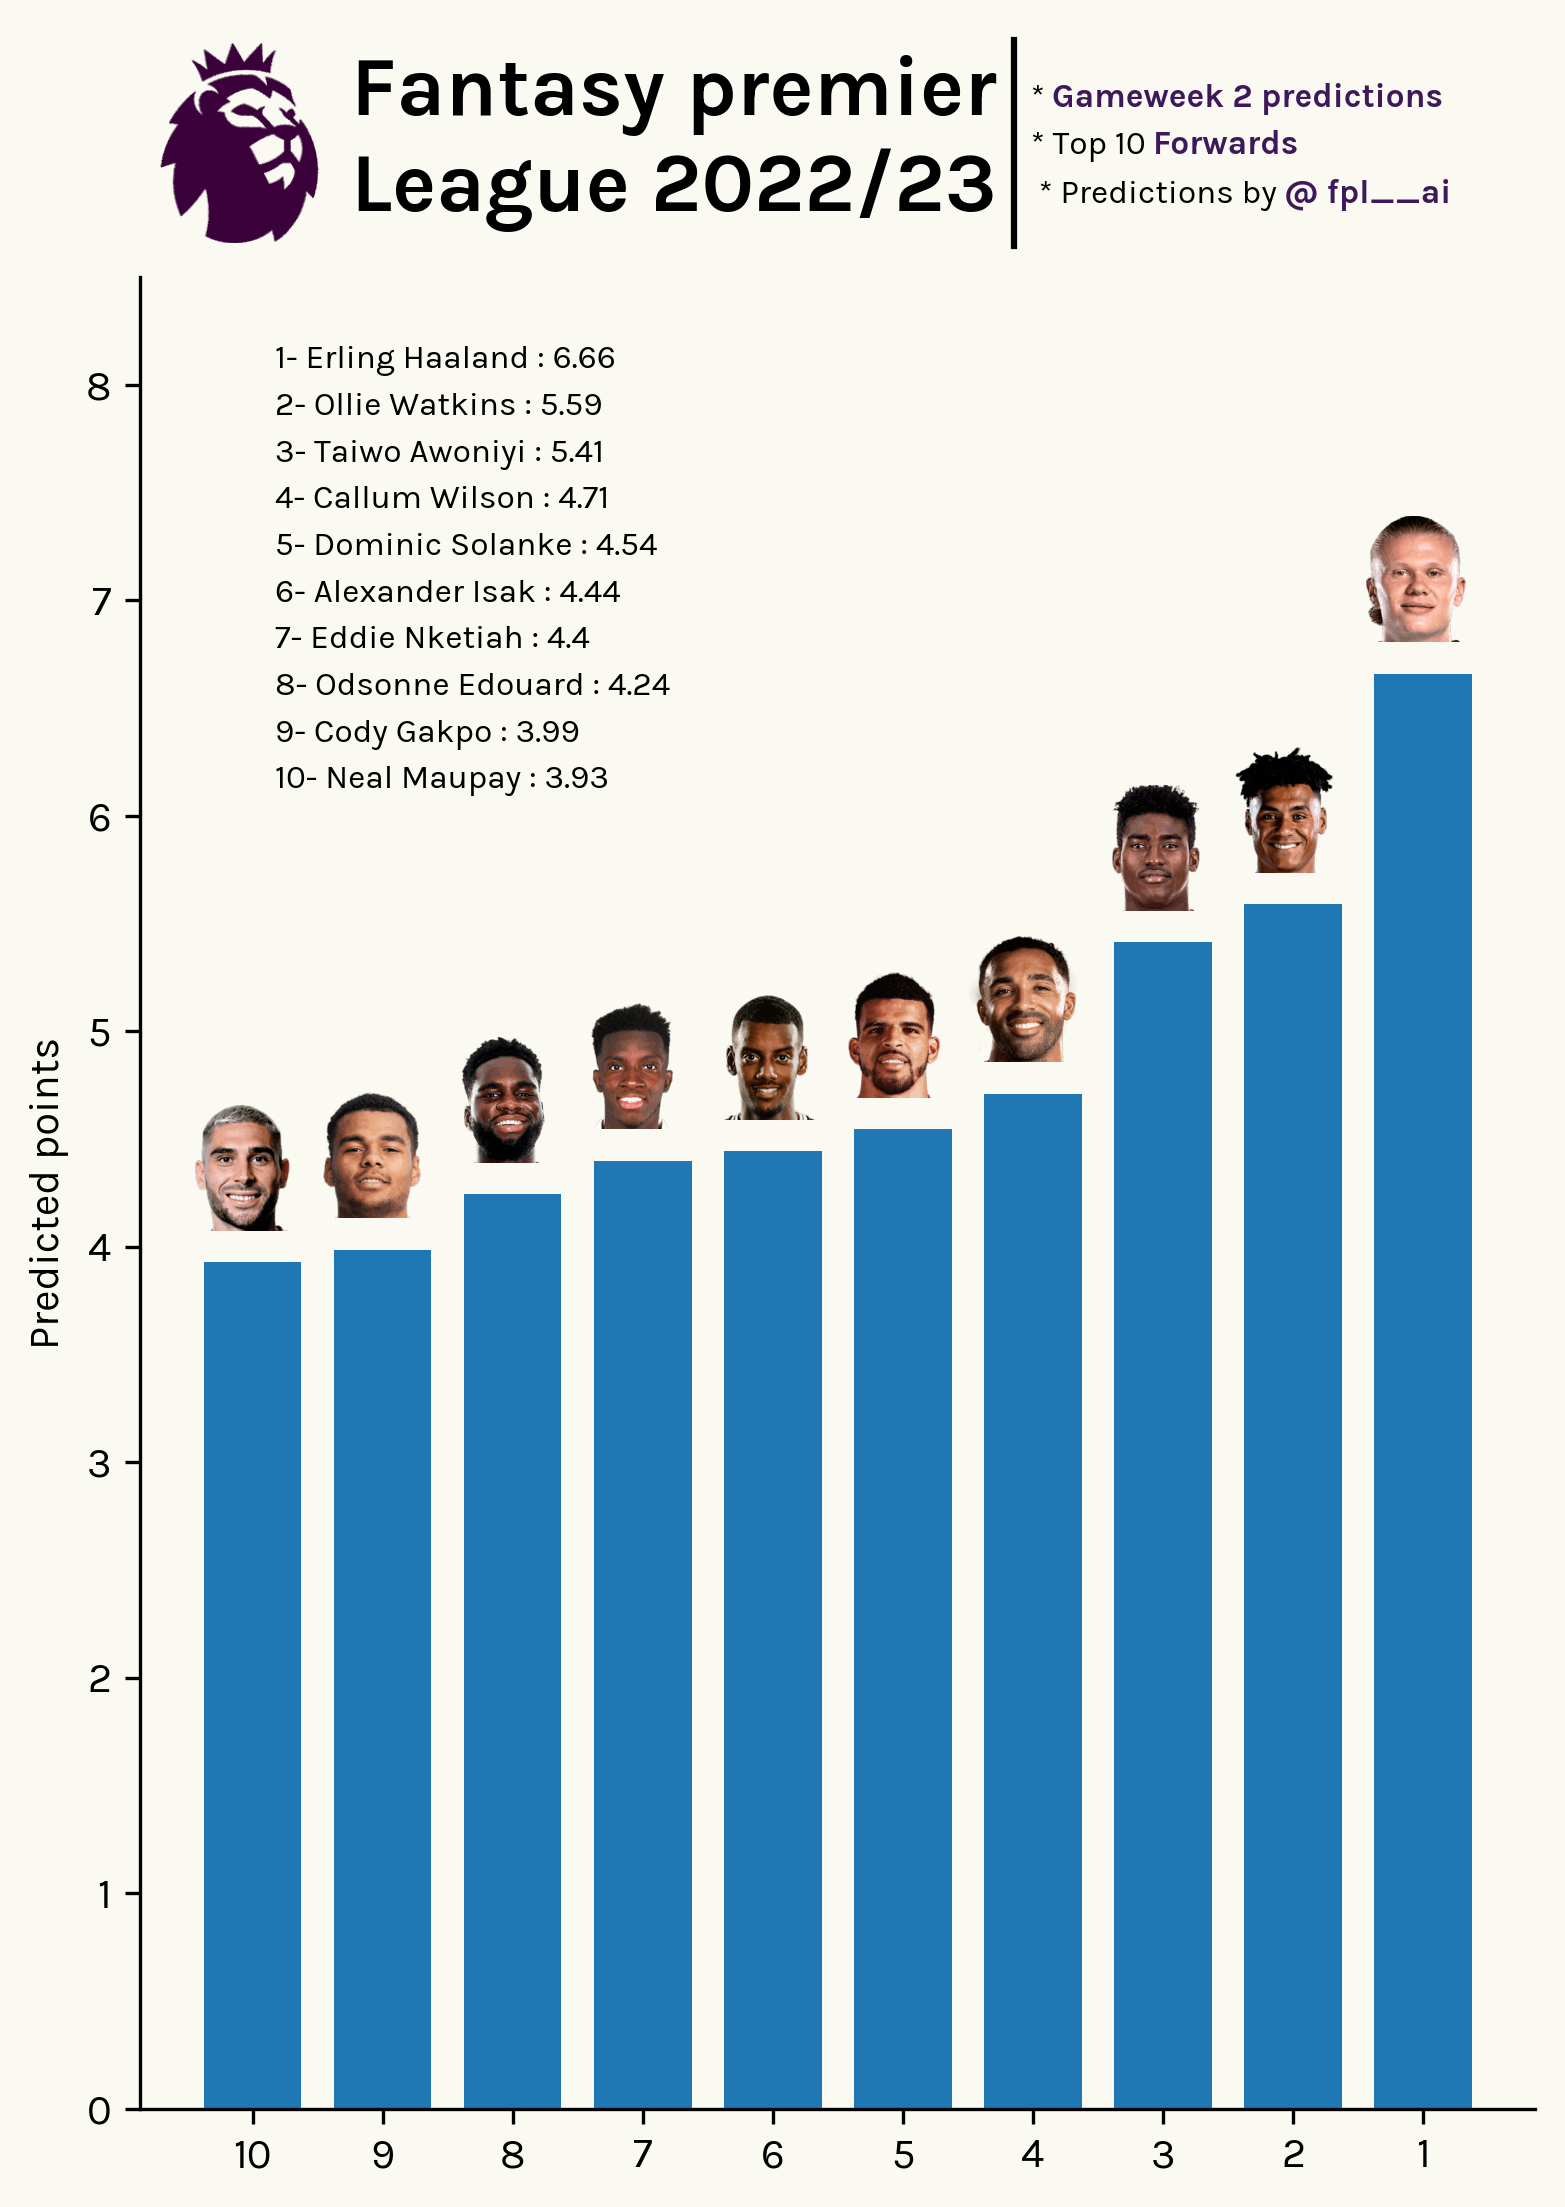

In [ ]:
color="#fafaf2"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width)
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,8.5)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Forwards> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()
s=""
for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  s=s+f"{i+1}- {name} : {point}\n"
fig_text(
    x =0.2, y = 0.59,
    s = s,
    va = "bottom", ha = "left",
    highlight_textprops = [
        #{"color": "#3d195b", "weight": "bold"},
        #{"color": "#3d195b", "weight": "bold"},
        #{"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black")

## Midfielders

In [ ]:
df=pd.read_csv("/content/midfielders_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
df

,level_0,index,name,team,points,value
0,10,Kaoru Mitoma2023-08-19T14:00:00Z,Kaoru Mitoma,Brighton,4.932441,65
1,9,Gabriel Martinelli Silva2023-08-21T19:00:00Z,Gabriel Martinelli Silva,Arsenal,5.049453,80
2,8,Eberechi Eze2023-08-21T19:00:00Z,Eberechi Eze,Crystal Palace,5.083082,65
3,7,Jarrod Bowen2023-08-20T15:30:00Z,Jarrod Bowen,West Ham,5.170593,70
4,6,Bukayo Saka2023-08-21T19:00:00Z,Bukayo Saka,Arsenal,5.215805,86
5,5,Pascal Groß2023-08-19T14:00:00Z,Pascal Groß,Brighton,5.244025,65
6,4,Son Heung-min2023-08-19T16:30:00Z,Son Heung-min,Spurs,5.322745,90
7,3,Marcus Rashford2023-08-19T16:30:00Z,Marcus Rashford,Man Utd,5.458461,90
8,1,Bruno Borges Fernandes2023-08-19T16:30:00Z,Bruno Borges Fernandes,Man Utd,6.864969,85
9,0,Mohamed Salah2023-08-19T14:00:00Z,Mohamed Salah,Liverpool,8.632016,125


<ipython-input-654-a9bce4bf2e0c>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


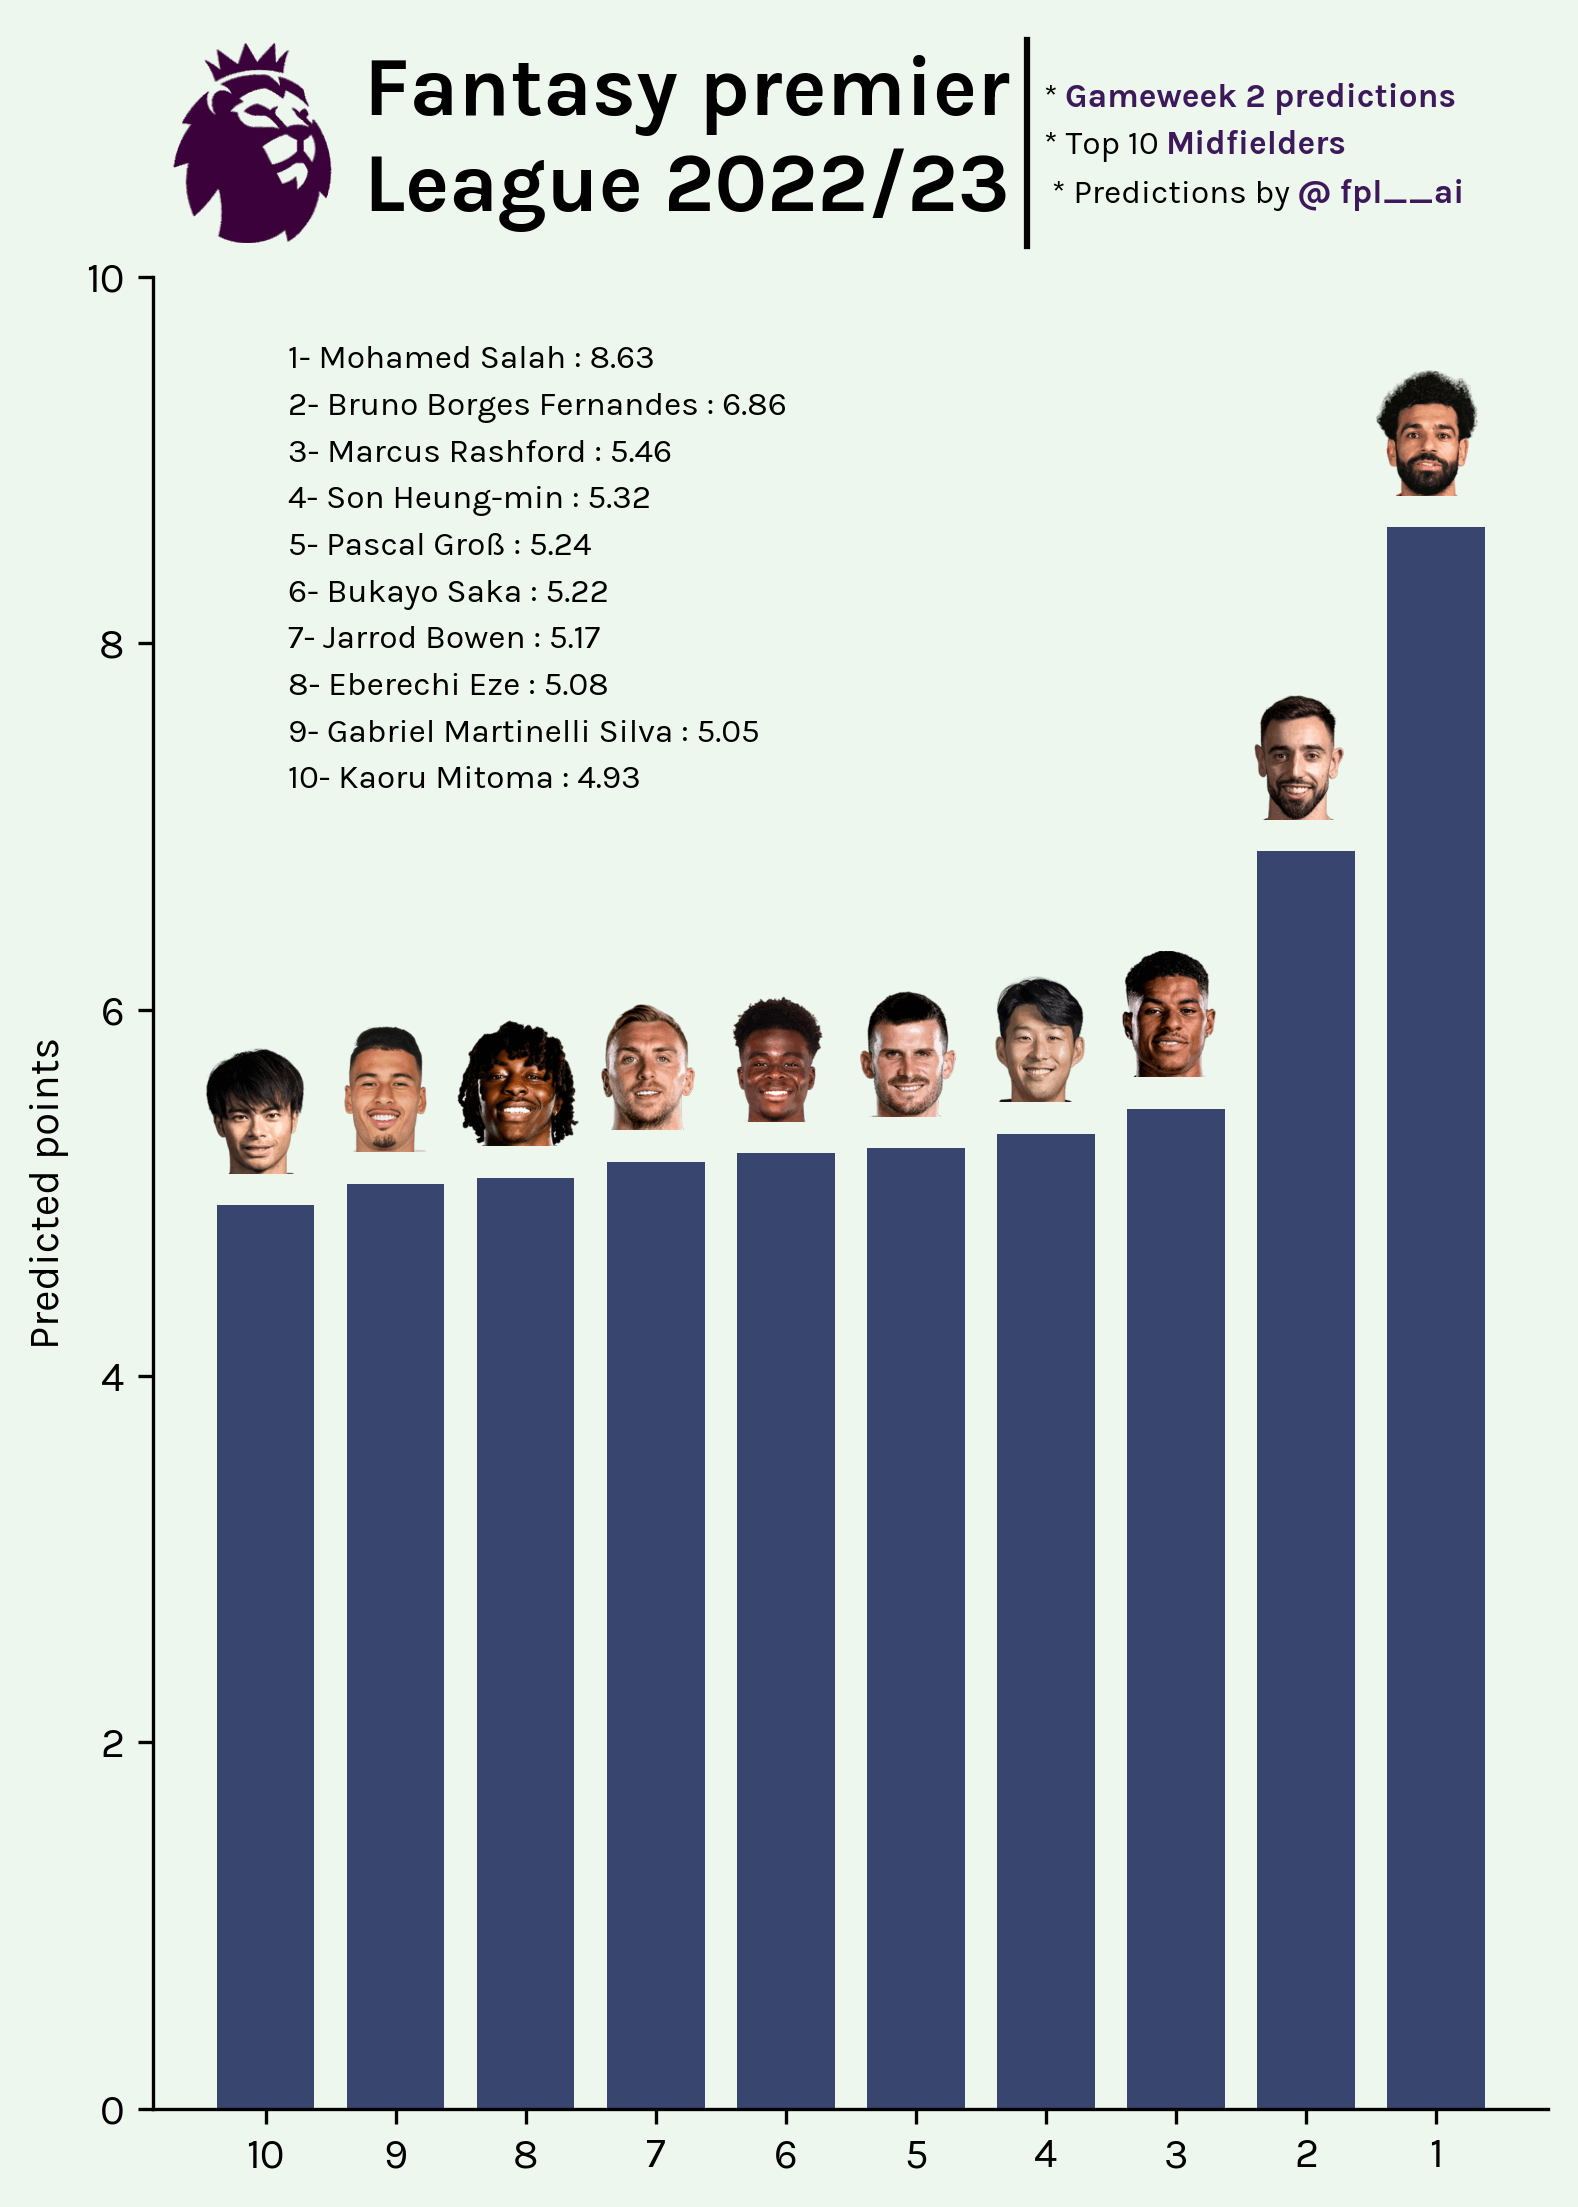

In [ ]:
color="#edf7ed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,10)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Midfielders> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()
s=""
for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  s=s+f"{i+1}- {name} : {point}\n"
fig_text(
    x =0.2, y = 0.59,
    s = s,
    va = "bottom", ha = "left",
    highlight_textprops = [
        #{"color": "#3d195b", "weight": "bold"},
        #{"color": "#3d195b", "weight": "bold"},
        #{"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black")

## Defenders

In [ ]:
df=pd.read_csv("/content/defenders_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(10).reset_index()

In [ ]:
df

,level_0,index,name,team,points,value
0,10,Pervis Estupiñán2023-08-19T14:00:00Z,Pervis Estupiñán,Brighton,3.766583,50
1,9,Axel Disasi2023-08-20T15:30:00Z,Axel Disasi,Chelsea,3.826160,50
2,8,Aaron Wan-Bissaka2023-08-19T16:30:00Z,Aaron Wan-Bissaka,Man Utd,3.931728,45
3,7,Virgil van Dijk2023-08-19T14:00:00Z,Virgil van Dijk,Liverpool,3.957869,60
4,6,Willy Boly2023-08-18T18:45:00Z,Willy Boly,Nott'm Forest,3.970363,45
5,4,Ben Chilwell2023-08-20T15:30:00Z,Ben Chilwell,Chelsea,4.052766,56
6,3,Luke Shaw2023-08-19T16:30:00Z,Luke Shaw,Man Utd,4.243980,55
7,2,Raphaël Varane2023-08-19T16:30:00Z,Raphaël Varane,Man Utd,4.285871,50
8,1,Andrew Robertson2023-08-19T14:00:00Z,Andrew Robertson,Liverpool,5.014951,65
9,0,Trent Alexander-Arnold2023-08-19T14:00:00Z,Trent Alexander-Arnold,Liverpool,5.271146,80


<ipython-input-657-f3ead5f48110>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])


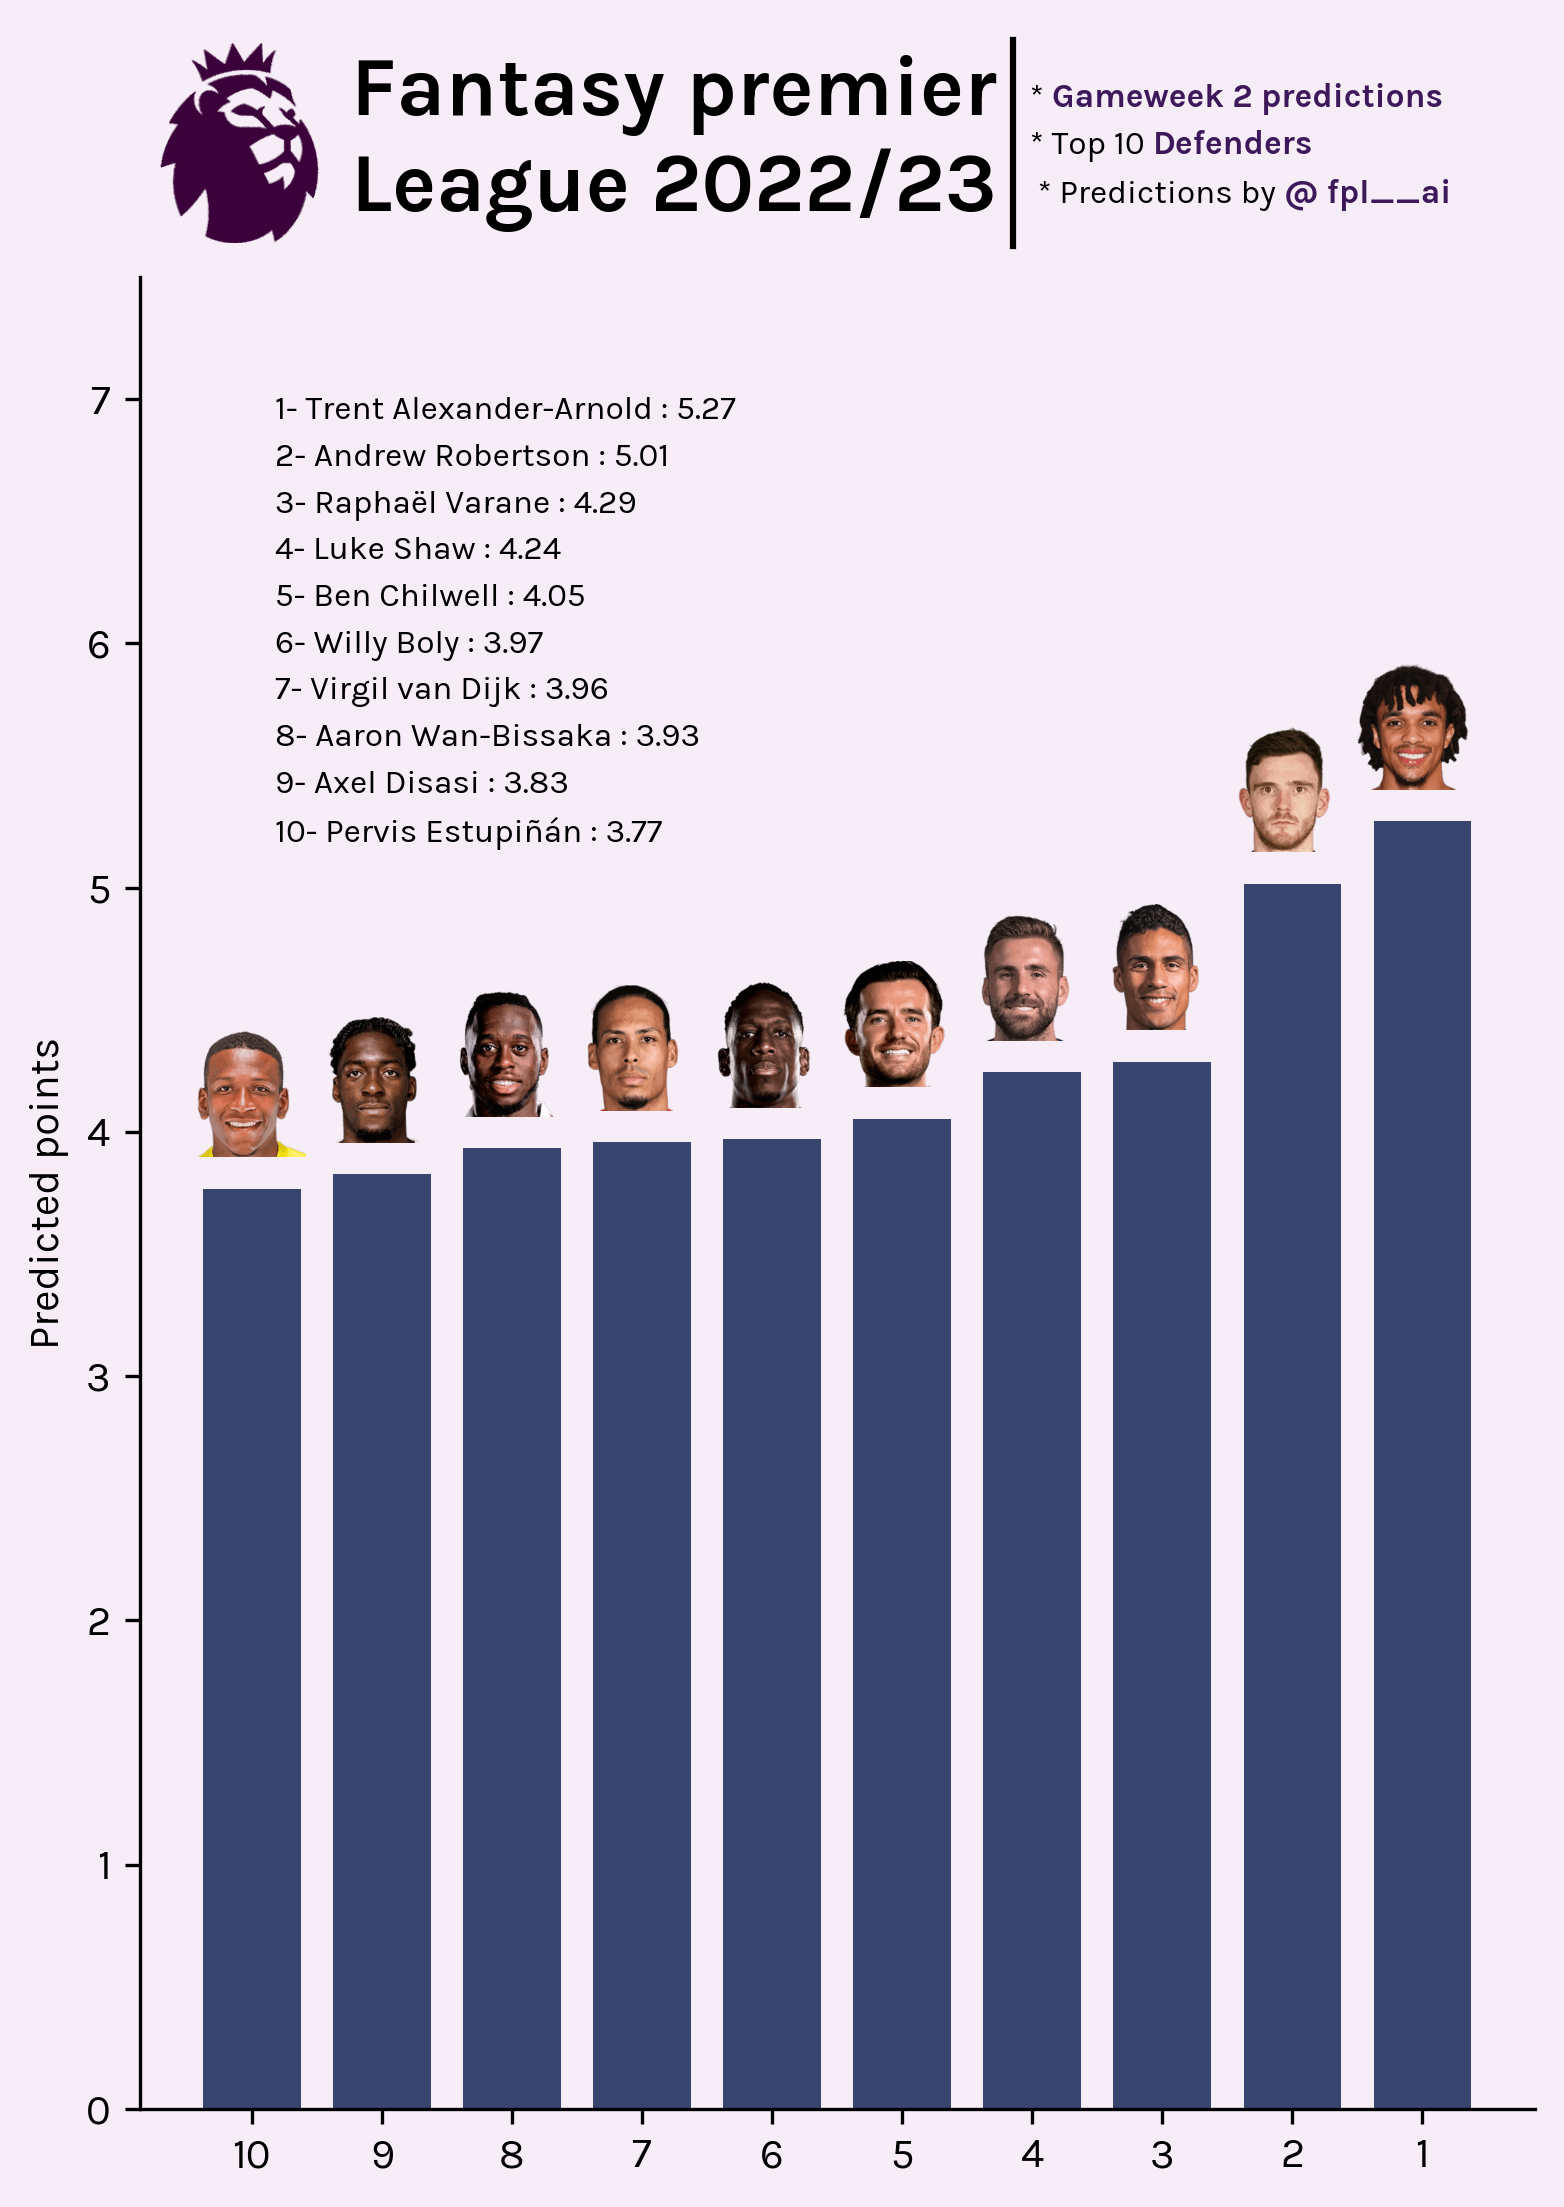

In [ ]:
color="#f7edf7"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(9,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,7.5)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/1.35, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 10 <Defenders> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

s=""
for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  s=s+f"{i+1}- {name} : {point}\n"
fig_text(
    x =0.2, y = 0.57,
    s = s,
    va = "bottom", ha = "left",
    highlight_textprops = [
        #{"color": "#3d195b", "weight": "bold"},
        #{"color": "#3d195b", "weight": "bold"},
        #{"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black")

## Goalkeepers

In [ ]:
df=pd.read_csv("/content/goalkeepers_points.csv")
df=df[~df["name"].isin(unavailable)]
df=df.sort_values("points",ascending=True).tail(6).reset_index()

In [ ]:
df

,level_0,index,name,team,points,value
0,7,Mark Flekken2023-08-19T14:00:00Z,Mark Flekken,Brentford,4.546045,45
1,6,Matt Turner2023-08-18T18:45:00Z,Matt Turner,Nott'm Forest,4.630320,40
2,5,Alisson Ramses Becker2023-08-19T14:00:00Z,Alisson Ramses Becker,Liverpool,4.727741,55
3,3,Wes Foderingham2023-08-18T18:45:00Z,Wes Foderingham,Sheffield Utd,5.478850,45
4,2,Emiliano Martínez Romero2023-08-20T13:00:00Z,Emiliano Martínez Romero,Aston Villa,5.569977,50
5,0,Bernd Leno2023-08-19T14:00:00Z,Bernd Leno,Fulham,7.237541,45


In [ ]:
df=df.head(6)

<ipython-input-661-49ed38727395>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax_dict["bar"].set_xticklabels([i+1 for i in range(5,-1,-1)])


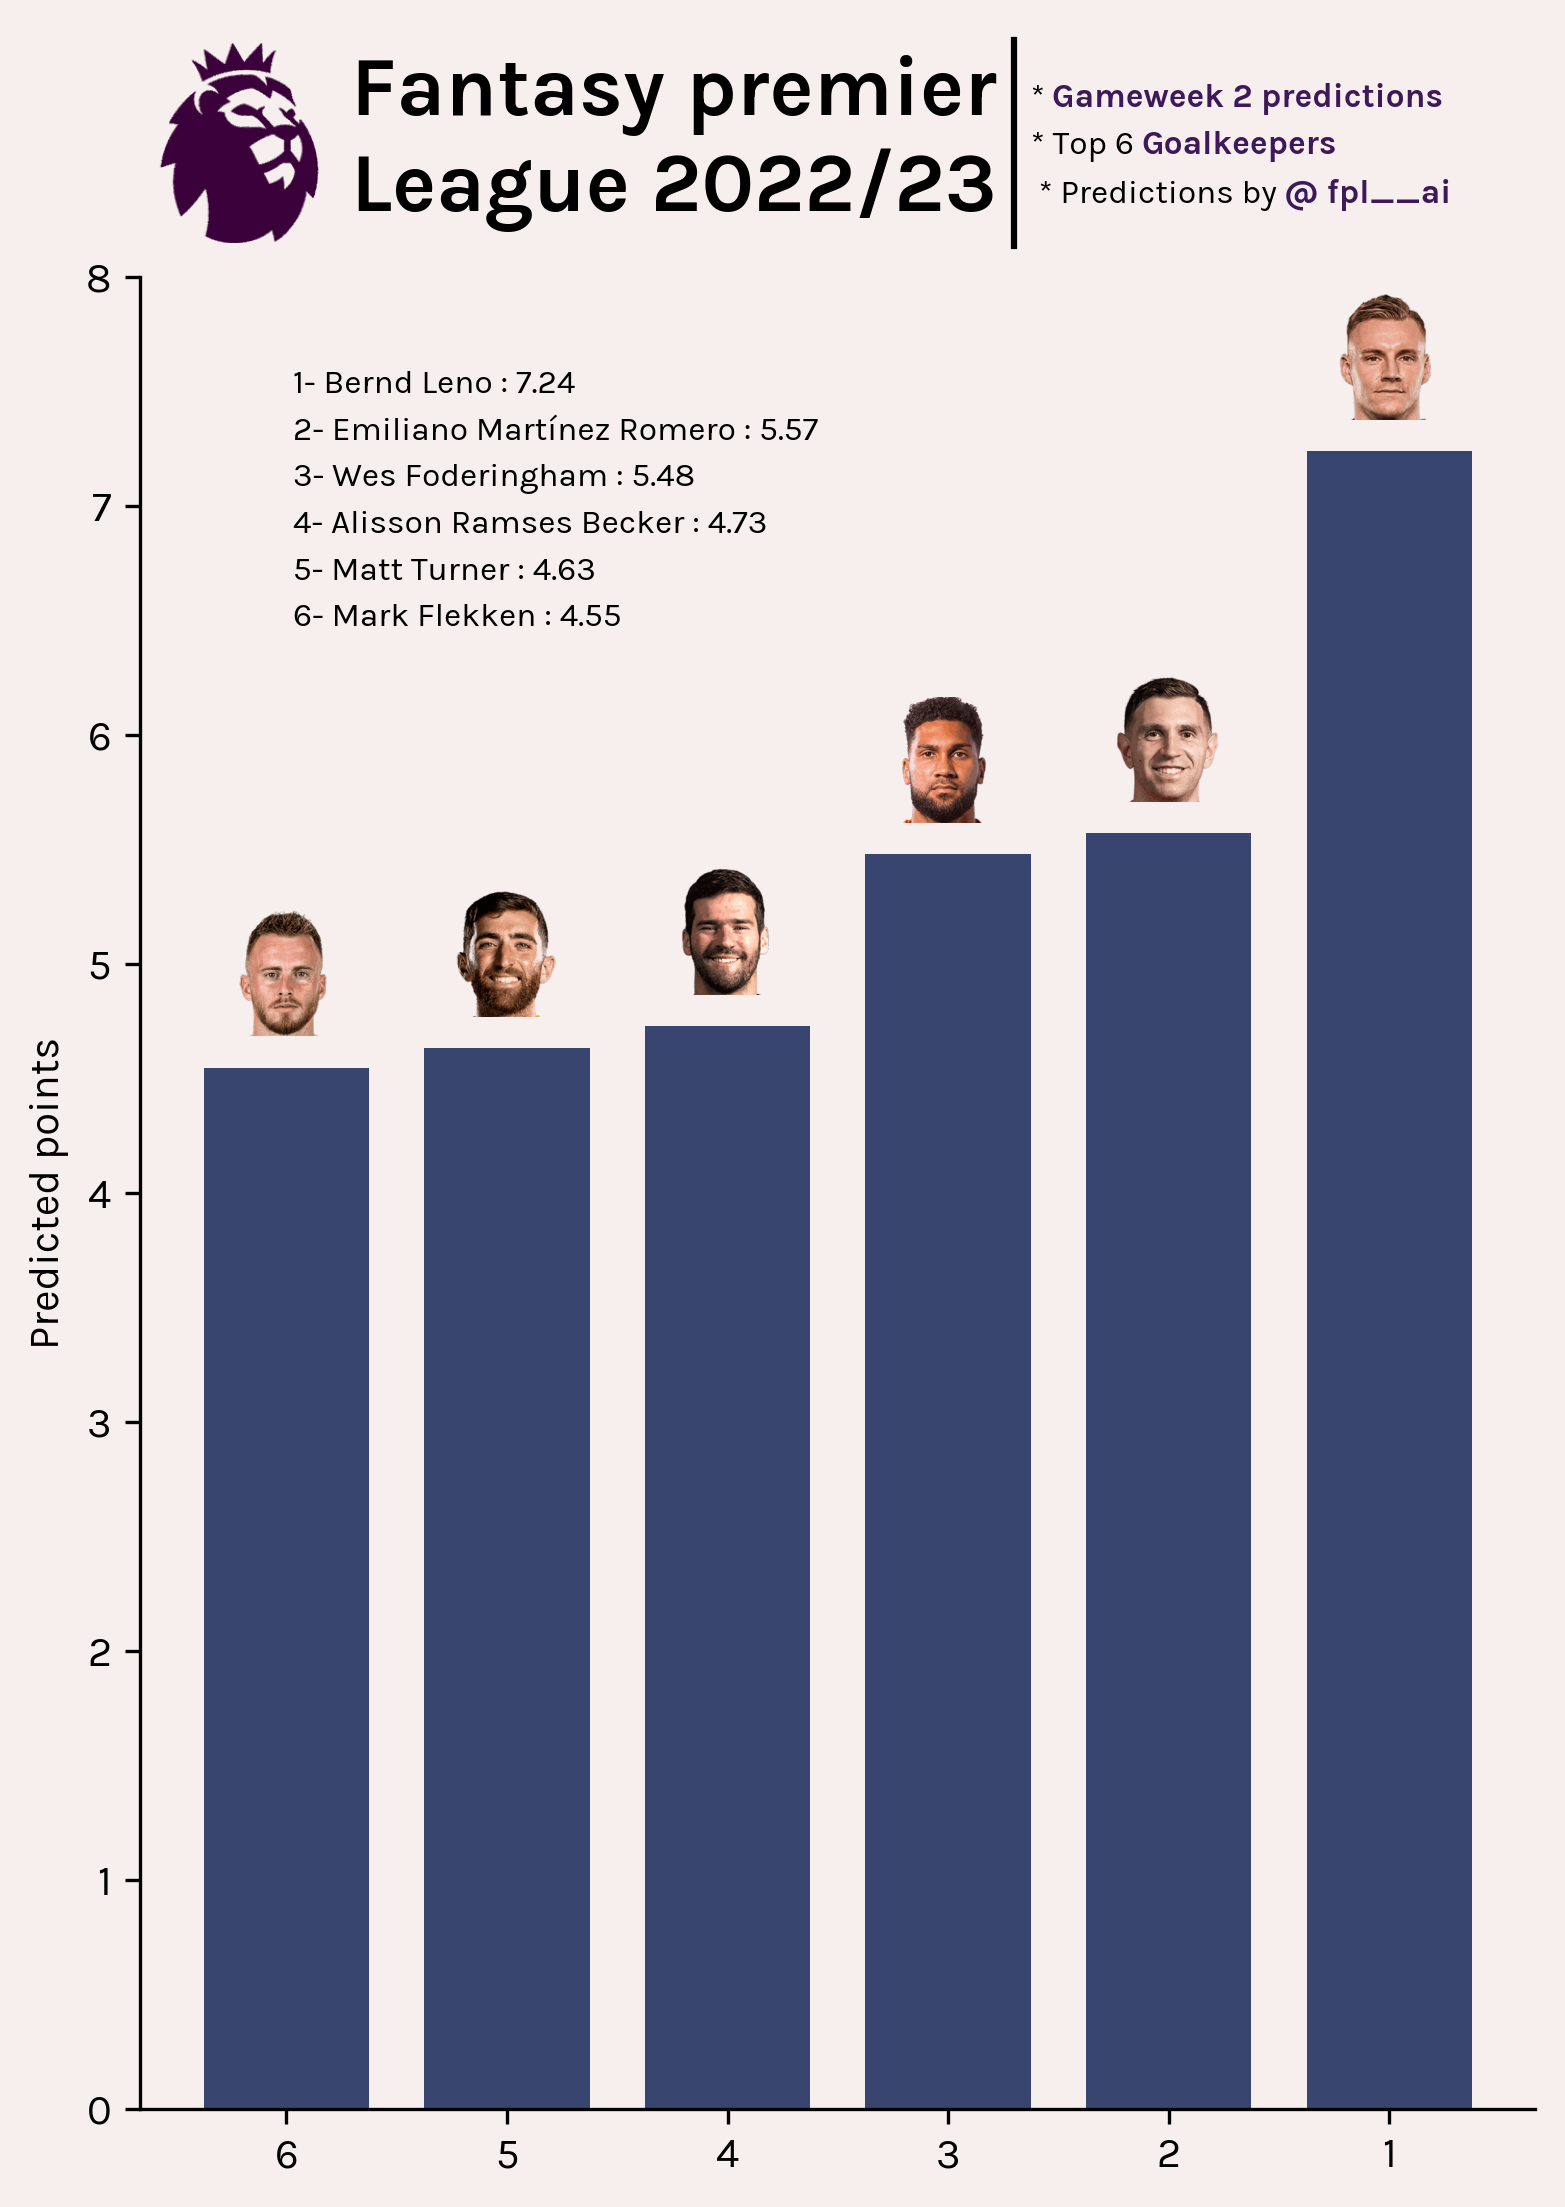

In [ ]:
color="#f7efed"
fig = plt.figure(facecolor =color,figsize=(6,9), dpi=300)#
ax_dict = fig.subplot_mosaic(
    layout
)



# Add grid and axis labels
#ax.grid(True, color = "lightgrey", ls = ":")



#bar chart
width=0.75
ax_dict["bar"].bar(df["name"],df["points"],width =width,color="#38456e")
# Adjust ticks
ax_dict["bar"].set_xticklabels([i+1 for i in range(5,-1,-1)])
#ax_dict["bar"].tick_params(labelbottom=False)
ax_dict["bar"].set_facecolor(color)
ax_dict["bar"].spines["top"].set_visible(False)
ax_dict["bar"].spines["right"].set_visible(False)
ax_dict["bar"].axis("on")
ax_dict["bar"].set_ylim(0,8)
ax_dict["bar"].set_ylabel('Predicted points')


ax_dict["heading"].set_facecolor("#fff3e0")
ax_dict["subheading"].set_facecolor("#fff3e0")
ax_dict["heading"].axis("off")
ax_dict["line"].axis("off")
ax_dict["subheading"].axis("off")

epl_logo_url = "https://images.fotmob.com/image_resources/logo/leaguelogo/47.png"
#logo_ax = fig.add_axes([-0.02, 0.8,1,1])
club_icon = Image.open(urllib.request.urlopen(epl_logo_url))
#club_icon.resize((2, 2))
ax_dict["logo"].imshow(club_icon)
ax_dict["logo"].axis("off")


# -- Transformation functions
DC_to_FC = ax_dict["bar"].transData.transform
FC_to_NFC = fig.transFigure.inverted().transform
# -- Take data coordinates and transform them to normalized figure coordinates
DC_to_NFC = lambda x: FC_to_NFC(DC_to_FC(x))

fotmob_url = "https://images.fotmob.com/image_resources/playerimages/"
for index, height in enumerate(df["points"]):
    ax_coords = DC_to_NFC([index - width/2.5, height])
    logo_ax = fig.add_axes([ax_coords[0], ax_coords[1], 0.07, 0.07])
    image_name=player_images[df["name"][index]]
    player_icon = Image.open(urllib.request.urlopen(fotmob_url+image_name))#.convert("LA")
    logo_ax.imshow(player_icon)
    logo_ax.axis("off")

ax_dict["heading"].annotate(
    xy = (0, .5),
    text = "Fantasy premier \nLeague 2022/23",
    ha = "left",
    va = "center",
    weight = "bold",
    size = 20, color="#000000"
)


ax_dict["line"].plot([0,0],[0,1], lw=1.5, color='black', marker='')
#ax_dict["heading"].get_xlim()[1], ax_dict["heading"].get_xlim()[1]
ax_text(
    x =-0.05, y = 0.2,
     s = f"* <Gameweek {gameweek} predictions>\n* Top 6 <Goalkeepers> \n * Predictions by <@ fpl__ai>",
    va = "bottom", ha = "left",
    highlight_textprops = [
        {"color": "#3d195b", "weight": "bold"},
        {"color": "#3d195b", "weight": "bold"},
        {"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black",ax=ax_dict["subheading"]
)

df=df.drop("level_0",axis=1).sort_values("points",ascending=False).reset_index()

s=""
for i,name in enumerate(df["name"]):
  point=round(df["points"][i],2)
  s=s+f"{i+1}- {name} : {point}\n"
fig_text(
    x =0.21, y = 0.65,
    s = s,
    va = "bottom", ha = "left",
    highlight_textprops = [
        #{"color": "#3d195b", "weight": "bold"},
        #{"color": "#3d195b", "weight": "bold"},
        #{"color":"#3d195b", "weight": "bold"},
    ],
    fontsize = 8, color = "black")